# Chapter 2

- github colab : https://homl.info/colab3
- 여기에는 high-level + 화면에 뿌리면 어떤 식으로 어떻게 보이는지 위주로 정리하자

In [2]:
# Prerequisite check

import packaging
import sklearn
import sys

def check_version():
    assert sys.version_info >= (3, 7)
    assert packaging.version.parse(sklearn.__version__) >= packaging.version.parse("1.0.1")
    
check_version()

## 1. Data 다운로드 + 대략적인 내용 파악

In [3]:
import pathlib
import tarfile
import urllib
import pandas

# pathlib 좋은듯?
def ch2_load_housing_data():
    tarball_path = pathlib.Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        pathlib.Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pandas.read_csv(pathlib.Path("datasets/housing/housing.csv"))

# 다운 받은 직후의 데이터
# pandas의 DataFrame이 return된다
input_dataframe = ch2_load_housing_data()

print(type(input_dataframe))
print()

# DataFrame column key 얻기
for k in input_dataframe:
    print(k)
print()

for i in range(5):
    print(input_dataframe['population'][i])

<class 'pandas.core.frame.DataFrame'>

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity

322.0
2401.0
496.0
558.0
565.0


In [4]:
#
# pandas.DataFrame.head는 DataFrame의 첫 n줄을 리턴한다
#
input_dataframe.head(8) # default = 5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [5]:
#
# pandas.DataFrame.info는 DataFrame의 요약을 print한다 (print만 한다)
# row count와 Non-null count가 일치하지 않은 곳 (total_bedrooms 같이) 은 median으로 채워넣는다던지 하는 후처리가 필요하다 (아래 참조)
#
input_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#
# DataFrame은 column을 다음과 같이 [] operator를 통해 접근할 수 있다
# pandas.DataFrame.value_counts는 각각의 값이 어느정도 빈도로 나오는지에 대한 Series를 리턴한다
# ocean_proximity와 같이 object type인 column은 이런걸로 한번 봐 주는게 좋다
#
print(type(input_dataframe['ocean_proximity']))
print()

s = input_dataframe['ocean_proximity'].value_counts()

# in 의 구현이 dict 와 다르다!

print(s['INLAND'])
print()

for k in s.index:
    print(f'{k:10} : {s[k]}')
print()

for k in s:
    print(k)
print()

<class 'pandas.core.series.Series'>

6551

<1H OCEAN  : 9136
INLAND     : 6551
NEAR OCEAN : 2658
NEAR BAY   : 2290
ISLAND     : 5

9136
6551
2658
2290
5



In [7]:
s = input_dataframe['ocean_proximity'].value_counts()
s['INLAND']

6551

In [8]:
#
# pandas.DataFrame.describe 는 수치 데이터에 대해 count, mean, std, min/max, percentile 같은 기본적인 통계를 낸다
# NaN value가 있는 경우 이는 무시 된다
# DataFrame또는 Series를 리턴한다
#
input_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# DataFrame으로 리턴해 주니까 같은 요령으로 사용해 주면 된다
d = input_dataframe.describe()

print(d['longitude']['count'])
print(d['latitude']['mean'])
print(d['housing_median_age']['25%'])

20640.0
35.63186143410853
18.0


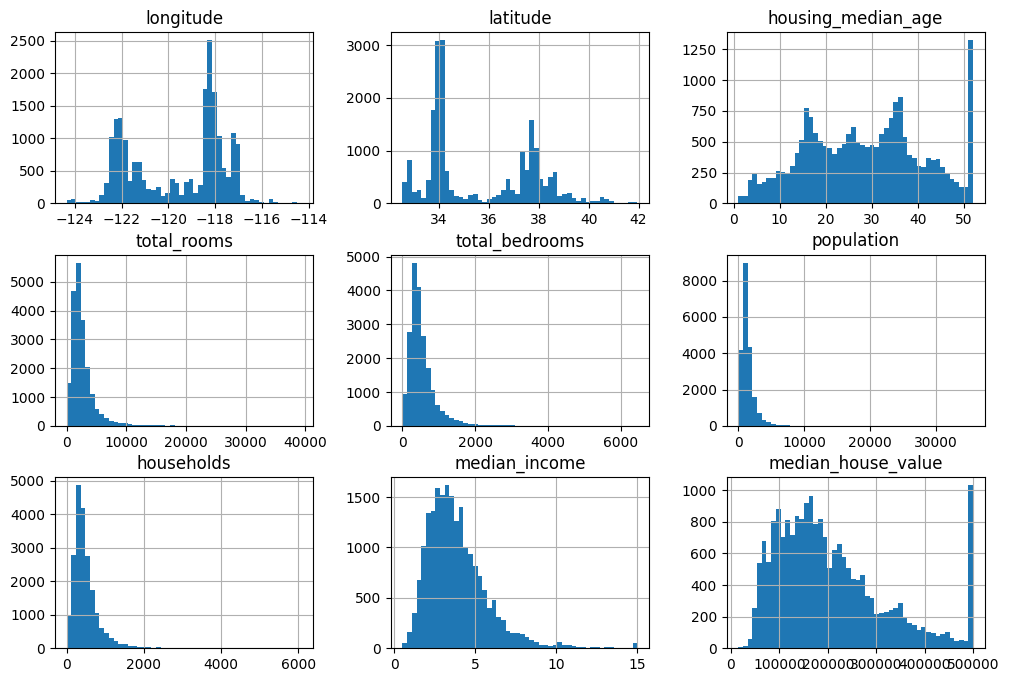

In [10]:
import matplotlib

# 
# pandas.DataFrame.hist는 DataFrame column에 대한 histogram을 생성한다
# 내부적으로 matplotlib.pyplot.hist를 사용한다
# bins로 histogram bin(=resolution)을 조정할 수 있다. figsize는 image 크기를 inch단위로 조절. 
# matplotlib에서 파일로 뽑을때 dpi를 사용함
#
input_dataframe.hist(bins=50, figsize=(12,8))

# Jupyter는 알아서 보여주니 필요 없긴 한데 원래 이렇게 해야 창이 뜨면서 histogram이 보여짐
matplotlib.pyplot.show()

In [11]:
#
# matplotlib으로 만든 graph를 파일로 저장하는 코드
# 
import matplotlib

def matplotlib_to_imagefile(output_dir, filename, imgext="png", tight_layout=True, resolution=300):
    path = output_dir / f"{filename}.{imgext}"
    if tight_layout:
        matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig(path, format=imgext, dpi=resolution)

output_dir : images/end_to_end_project


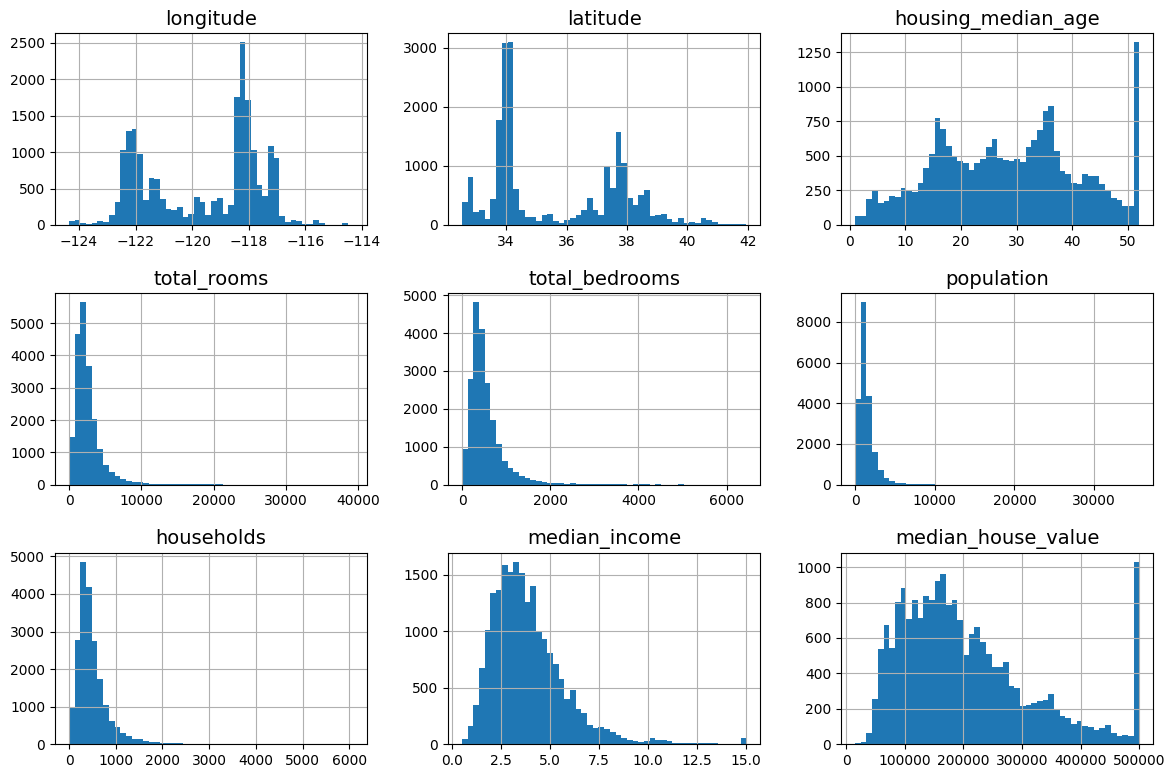

In [12]:
#
# matplotlib을 세부 조정하는 코드. 참고용
# 

# extra code – the next 5 lines define the default font sizes
matplotlib.pyplot.rc('font', size=14)
matplotlib.pyplot.rc('axes', labelsize=14, titlesize=14)
matplotlib.pyplot.rc('legend', fontsize=14)
matplotlib.pyplot.rc('xtick', labelsize=10)
matplotlib.pyplot.rc('ytick', labelsize=10)

# matplotlib에 그리기
input_dataframe.hist(bins=50, figsize=(12, 8))

# 저장할 디렉토리 설정
output_dir = pathlib.Path() / "images" / "end_to_end_project"
output_dir.mkdir(parents=True, exist_ok=True)
print(f'output_dir : {output_dir}')

matplotlib_to_imagefile(output_dir, "attribute_histogram_plots")

# Not necessary for jupyter. Necessary for normal python execution
matplotlib.pyplot.show()

In [13]:
from sklearn.model_selection import train_test_split

# random_state makes sure we always select the same train/test set
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set), len(test_set))

NameError: name 'housing' is not defined